In [15]:
import pandas as pd
import os
from typing import Literal
import matplotlib.pyplot as plt
import seaborn as sns
import random

dir = 'C:/Users/Will/Desktop/results/'
bct = pd.read_csv(dir + 'results_bct_combined.csv')
gnm = pd.read_csv(dir + 'results_gnm.csv')

# data cleaning - round density to 1 decimal place
bct['density'] = bct['density'].round(1)
gnm['density'] = gnm['density'].round(1)

bct = bct.loc[~(bct['density']==0.2)]

# bct = bct.loc[bct['time_bct'] < 2000]
# bct.head()

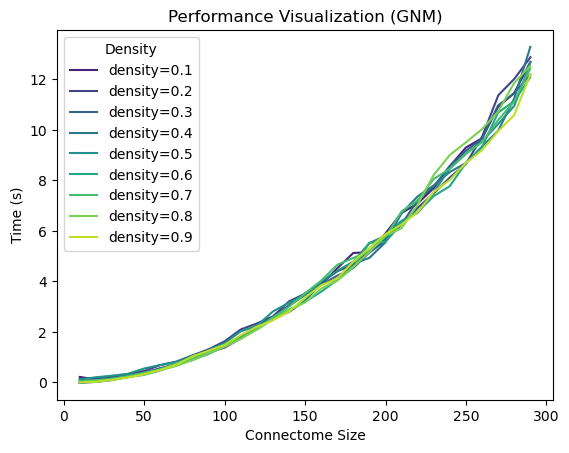

In [17]:

def visualize_performance(df, gnm_or_bct: Literal['gnm', 'bct']):
    #plt.figure(figsize=(8, 6))
    cmap_choice = {'gnm':'viridis', 
                   'bct':'plasma'}
    
    palette = sns.color_palette(cmap_choice[gnm_or_bct], len(df['density'].unique()))
    
    for i, d in enumerate(sorted(df['density'].unique())):
        tmp_df = df[df['density'] == d] + random.uniform(-0.1, 0.1)
        plt.plot(tmp_df['connectome_size'], 
                 tmp_df[f'time_{gnm_or_bct}'], 
                 label=f'density={d}',
                 color=palette[i])
    
    plt.legend(title="Density")
    plt.xlabel("Connectome Size")
    plt.ylabel("Time (s)")
    plt.title(f"Performance Visualization ({gnm_or_bct.upper()})")

visualize_performance(gnm, 'gnm')
#visualize_performance(bct, 'bct')
plt.show()